In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
#cargar el df unido
df = pd.read_csv("Customer_Flight_Loyalty_unido.csv", index_col=0) 
df.head()

,Loyalty Numberflight,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018,1
3,100214,2017,1,0,0,0,0,0.0,0,0,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0,0


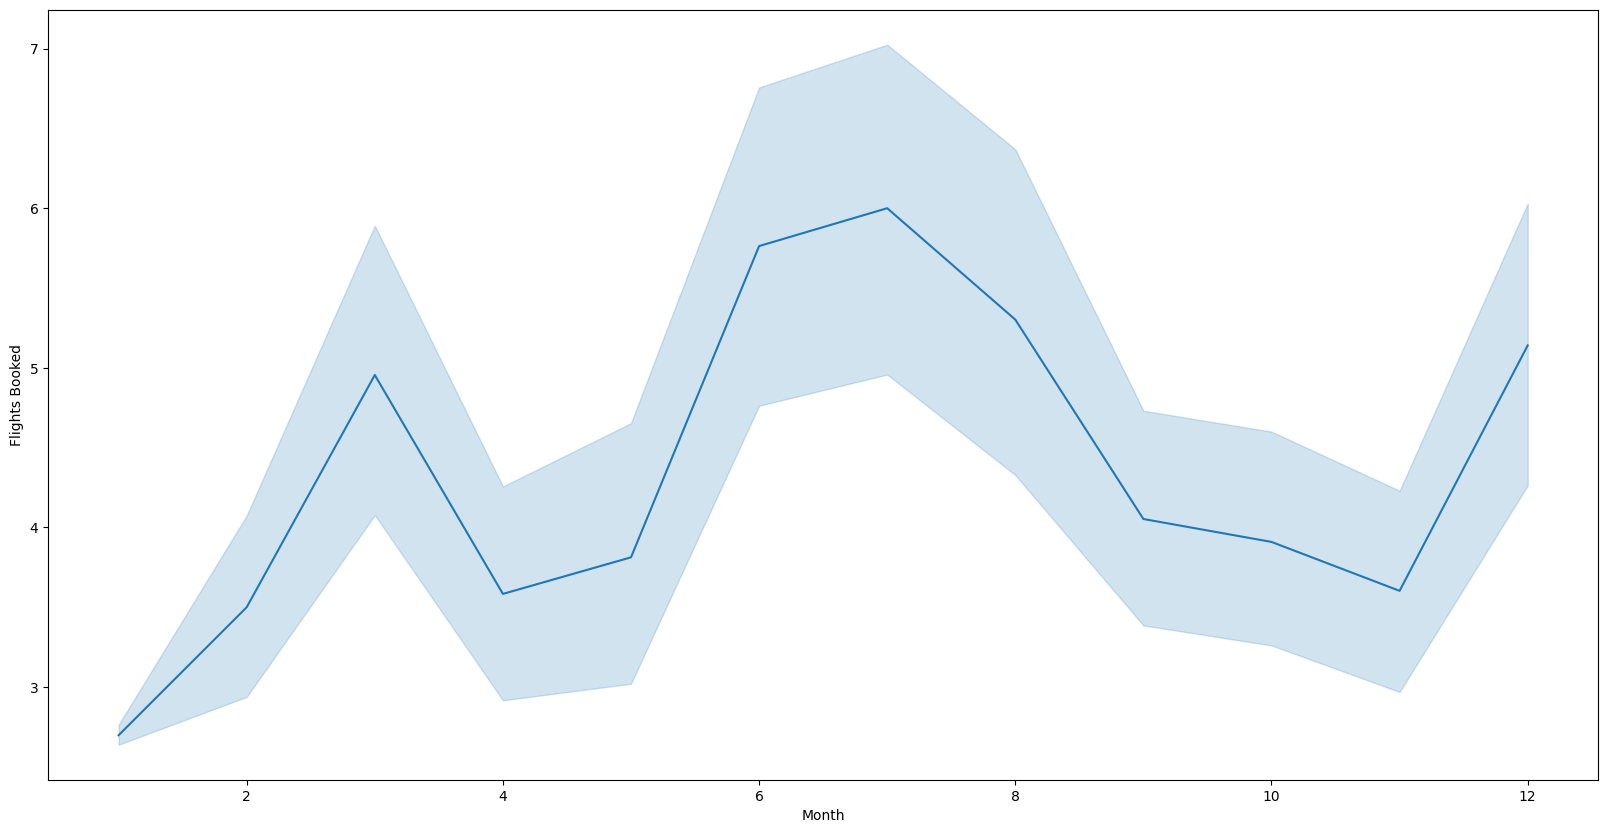

In [44]:
#1.	¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
#Lineplot
# La gráfica muestra claramente que hay picos de reservas en meses en concreto (julio), pero la zona sombreada
#  indica que el comportamiento de los clientes no es homogeneo y la los datos son menos fiables.

plt.figure(figsize=(20,10))
sns.lineplot(data=df, x="Month", y="Flights Booked");

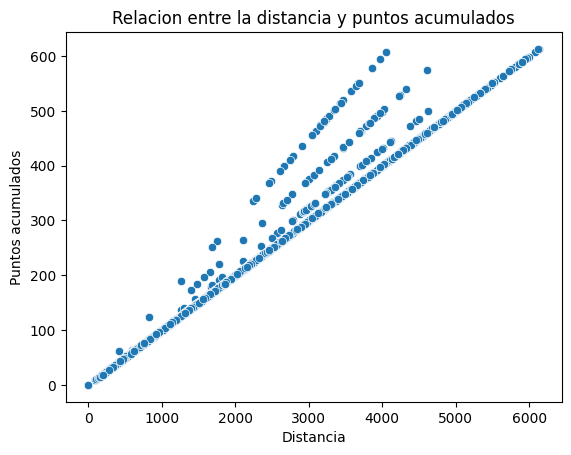

In [6]:
#2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
#Scatterplot
# Sí, existe una relación positiva entre la distancia de los vuelos y los puntos acumulados por los clientes.
#  A mayor distancia recorrida en los vuelos, los clientes tienden a acumular más puntos.
#  Esto se ve en el gráfico de dispersión, donde los puntos forman una tendencia ascendente.

#Uso un scatterplot o grafico de dispercion. 
sns.scatterplot(x = "Distance", y = "Points Accumulated", data = df)
plt.ylabel("Puntos acumulados")
plt.xlabel("Distancia")
plt.title("Relacion entre la distancia y puntos acumulados");



,Province,Cantidad de Clientes
0,Alberta,963
1,British Columbia,4378
2,Manitoba,657
3,New Brunswick,630
4,Newfoundland,256
5,Nova Scotia,514
6,Ontario,5360
7,Prince Edward Island,65
8,Quebec,3280
9,Saskatchewan,405


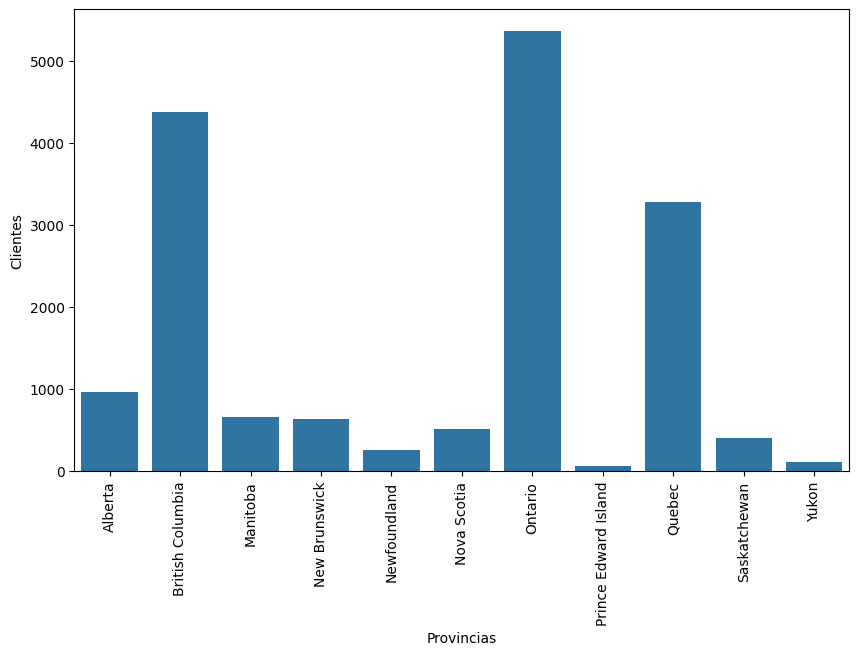

In [48]:
#3.	¿Cuál es la distribución de los clientes por provincia o estado?
#Barplot
#La distribución de los clientes por provincia muestra que Ontario tiene la mayor cantidad de clientes, 
# seguida por British Columbia y Quebec. 
# Las provincias con la menor cantidad de clientes son Prince Edward Island y Yukon. 


df_provincias = df.groupby('Province').size().reset_index(name='Cantidad de Clientes')
display(df_provincias)
plt.figure(figsize=(10, 6))
sns.barplot(x = "Province", y = "Cantidad de Clientes", data = df_provincias)
plt.xticks(rotation=90)
plt.ylabel("Clientes")
plt.xlabel("Provincias");


,Education,Salary
0,Bachelor,72588.327820
1,College,73455.000000
2,Doctor,178400.221154
3,High School or Below,61195.383033
4,Master,103825.294466


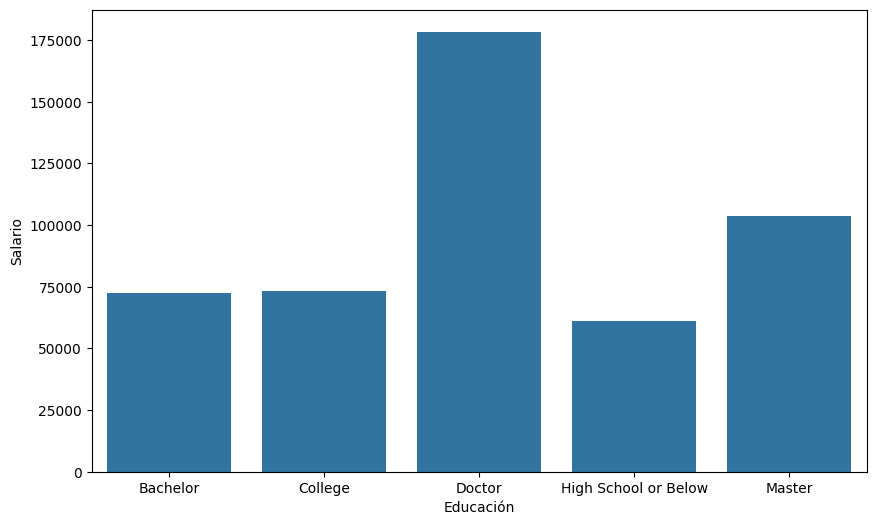

In [14]:
#4.	¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
#Barplot
#Se agrupan columnas (education y salary) y se calcula la media 
#La educación tiene un impacto significativo en el salario promedio de los clientes. 
# Los datos muestran que a medida que se alcanza un nivel educativo más alto, los salarios promedio aumentan. 

salario_promedio_educacion = df.groupby('Education')['Salary'].mean().reset_index()
display(salario_promedio_educacion)


plt.figure(figsize=(10, 6))
sns.barplot(x = "Education", y = "Salary", data = salario_promedio_educacion)
plt.ylabel("Salario")
plt.xlabel("Educación");

,Loyalty Card,Cantidad de Clientes
0,Aurora,3396
1,Nova,5635
2,Star,7587


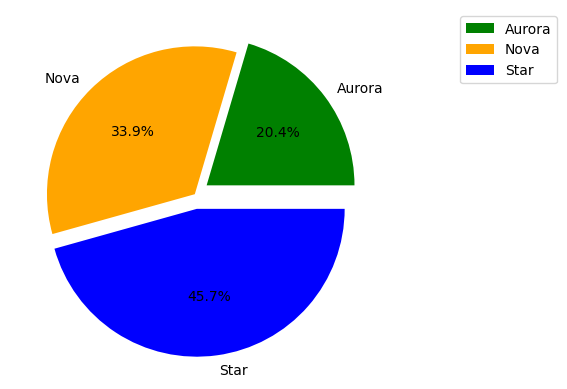

In [46]:
#5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
#Pie
# La tarjeta de fidelidad más común entre los clientes es la "Star", seguida por la "Nova".
# La tarjeta "Aurora" tiene la menor cantidad de clientes. Esto sugiere que la mayoría de 
# los clientes prefieren la tarjeta "Star", lo cual podría estar relacionado con los beneficios
# o condiciones que esta tarjeta ofrece en comparación con las otras dos.

tarjetas_fidelidad = df.groupby('Loyalty Card').size().reset_index(name='Cantidad de Clientes')
display(tarjetas_fidelidad)

explode = ( 0.1 ,0, 0.1) # para sacar los quesitos hacia fuera

plt.pie( tarjetas_fidelidad["Cantidad de Clientes"], 
        labels = tarjetas_fidelidad["Loyalty Card"], 
        autopct = "%1.1f%%", 
        colors = ["green", "orange", "blue"],
        explode = explode)

plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) 
plt.show();

,Loyalty Card,Cantidad de Clientes
0,Aurora,3396
1,Nova,5635
2,Star,7587


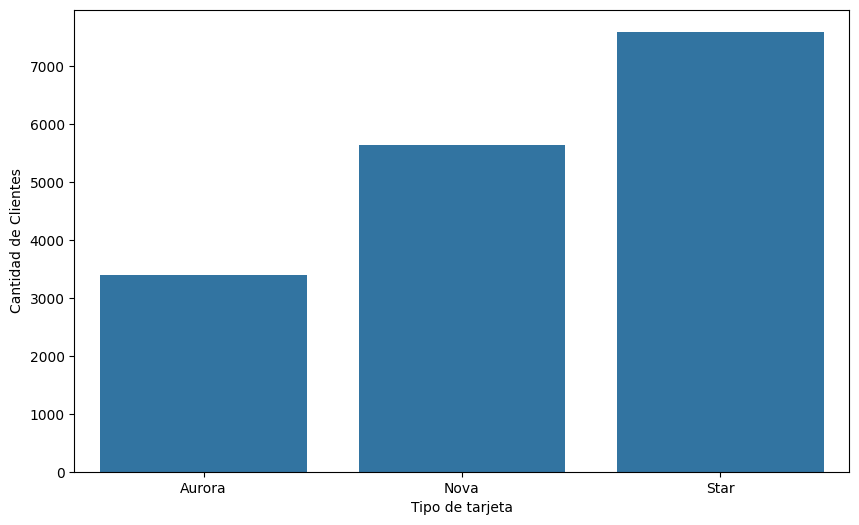

In [20]:
#5.	¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
# otra forma de hacerlo es con un barplot pero no muestra directamente el porcentaje.

tarjetas_fidelidad = df.groupby('Loyalty Card').size().reset_index(name='Cantidad de Clientes')
display(tarjetas_fidelidad)

plt.figure(figsize=(10, 6))
sns.barplot(x = "Loyalty Card", y = "Cantidad de Clientes", data = tarjetas_fidelidad)
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Tipo de tarjeta");

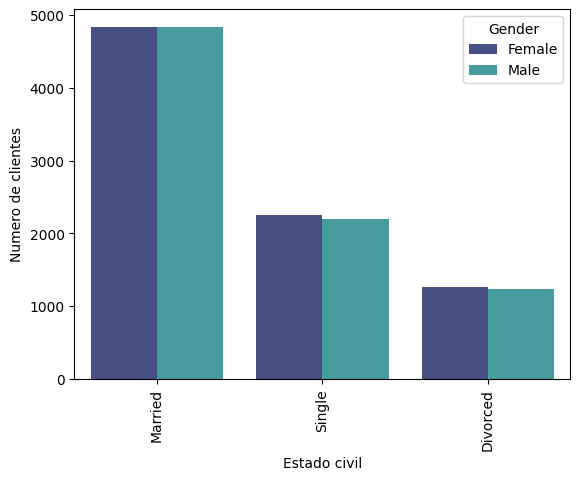

In [36]:
#6.	¿Cómo se distribuyen los clientes según su estado civil y género?
#Countplot
#La mayor parte de los clientes están casados, hay pocos divorciados y la distribucion
#  por genero es practicamente igual.(casi los mismos hombres que mujeres)

# Crear el gráfico de barras agrupadas o countplot
sns.countplot(x = "Marital Status", 
              data = df, 
              palette = "mako", 
              order = ['Married', 'Single', 'Divorced'],
              hue= "Gender")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Estado civil")
plt.ylabel("Numero de clientes"); 

In [47]:
#se agrupan columnas 
solteros_casados = df.groupby(['Marital Status','Gender']).size().reset_index(name='Clientes')
display(solteros_casados)



,Marital Status,Gender,Clientes
0,Divorced,Female,1262
1,Divorced,Male,1237
2,Married,Female,4833
3,Married,Male,4838
4,Single,Female,2252
5,Single,Male,2196
